# Multiclass oversampling

In this notebook, multiclass oversampling is illustrated. The number of oversampling techniques supporting multiclass oversampling is limited, most of the oversamplers are formulated for binary oversampling problems. However, multiclass oversampling can be implemented as binary oversampling applied repeatedly to various combinations of classes. This approach is not supported by all binary oversamplers, for example, by those changing the majority samples. In the current version of the ```smote_variants``` package, there are 61 binary oversamplers which can be used for multiclass oversampling. The list of these can be queried by the function ```get_all_oversamplers_multiclass```.

In [1]:
import smote_variants as sv
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the dataset
dataset= datasets.load_wine()
X, y= dataset['data'], dataset['target']

## Illustrating the imbalanced nature

The imbalanced nature of the multiclass ```wine``` dataset is illustrated.

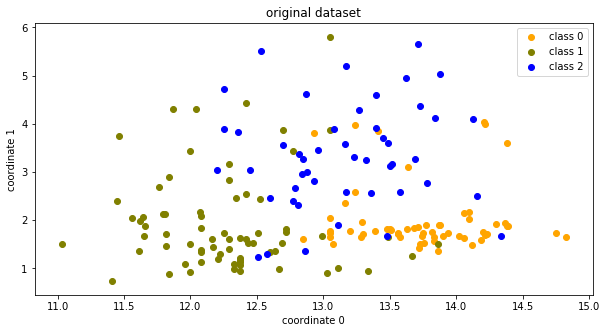

In [3]:
# Plotting the dataset to illustrate its imbalanced nature. Only the first two coordinates are plotted.
colors= ['orange', 'olive', 'blue']

plt.figure(figsize=(10, 5))
for i in np.unique(y):
    plt.scatter(X[y == i][:,0], X[y == i][:,1], label='class %d' % i, c= colors[i])
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

In [4]:
# printing the number of samples

for i in np.unique(y):
    print("class %d - samples: %d" % (i, np.sum(y == i)))

class 0 - samples: 59
class 1 - samples: 71
class 2 - samples: 48


## Oversampling

In this section multiclass oversampling is driven by the binary oversampler ```distance_SMOTE```.

In [5]:
# chosing an oversampler supporting multiclass oversampling

oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())

In [6]:
X_samp, y_samp= oversampler.sample(X, y)

2019-06-11 18:18:25,764:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-06-11 18:18:25,765:INFO:MulticlassOversampling: Sampling minority class with label: 0
2019-06-11 18:18:25,765:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1}")
2019-06-11 18:18:25,767:INFO:MulticlassOversampling: Sampling minority class with label: 2
2019-06-11 18:18:25,768:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.24468085106382978, 'n_neighbors': 5, 'n_jobs': 1}")


## Illustrating the outcome

In [7]:
# printing the number of samples

for i in np.unique(y_samp):
    print("class %d - samples: %d" % (i, np.sum(y_samp == i)))

class 0 - samples: 71
class 1 - samples: 71
class 2 - samples: 71


In [8]:
# filtering for new samples

X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

In [9]:
# printing the number of new samples

for i in np.unique(y_samp):
    print("class %d - samples: %d" % (i, np.sum(y_samp == i)))

class 0 - samples: 12
class 2 - samples: 23


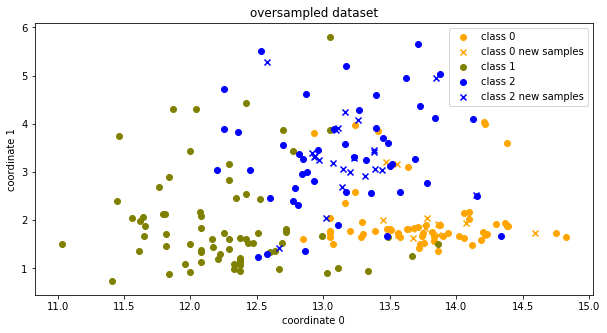

In [10]:
plt.figure(figsize=(10, 5))

for i in np.unique(y):
    # plotting original sampels
    plt.scatter(X[y == i][:,0], 
                X[y == i][:,1], 
                label='class %d' % i, 
                c=colors[i],
                marker='o')
    
    # plotting new samples
    if len(y_samp[y_samp == i]):
        plt.scatter(X_samp[y_samp == i][:, 0], 
                    X_samp[y_samp == i][:, 1], 
                    label='class %d new samples' % i, 
                    c=colors[i], 
                    marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()